In [1]:
# Temel kütüphaneler
import numpy as np  # Sayısal işlemler için
import pandas as pd  # Veri işleme ve analiz için

# Veriyi bölme işlemleri için
from sklearn.model_selection import train_test_split

# Karar Ağacı Sınıflandırıcısı için
from sklearn.tree import DecisionTreeClassifier

# Model performansını değerlendirmek için metrikler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Görselleştirme için (opsiyonel)
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#Veri Setimizi Yükleyelim
data=pd.read_csv('WineQT.csv')

In [3]:
#Veri Seti Hakkında Bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
#Veri Setinde Eksik Kontrolü
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
#İstatiksel Özet Alalım
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [6]:
#iLK 5 Satırı Görelim
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
#Id sütununu silelim
data.drop(columns=['Id'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [8]:
#Bağımlı ve Bağımsız Değişkenlerini Seçelim
X=data.drop(columns=['quality'])
y=data['quality']

In [9]:
#Veri Setini Test ve Train olarak ayıralım
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
#Model Kuralım
model=DecisionTreeClassifier(criterion='gini',random_state=42)

In [11]:
#Modeli Eğitelim
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
#Tahminleme yapalım
y_pred=model.predict(X_test)

In [13]:
#Değerlendirme Ölçütlerini Uygulayalım
print("Sınıflandırma Raporu",classification_report(y_test,y_pred))
print("Karışıklık Matrisi:",confusion_matrix(y_test,y_pred))

Sınıflandırma Raporu               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.33      0.33      0.33         6
           5       0.65      0.66      0.65        96
           6       0.56      0.45      0.50        99
           7       0.45      0.69      0.55        26
           8       0.33      0.50      0.40         2

    accuracy                           0.56       229
   macro avg       0.39      0.44      0.41       229
weighted avg       0.58      0.56      0.56       229

Karışıklık Matrisi: [[ 0  0  0  0  0  0]
 [ 0  2  2  1  1  0]
 [ 0  3 63 27  3  0]
 [ 2  1 32 45 17  2]
 [ 0  0  0  8 18  0]
 [ 0  0  0  0  1  1]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5089722610574479, 0.9722222222222222, 'alcohol <= 10.35\ngini = 0.645\nsamples = 914\nvalue = [6, 27, 387, 363, 117, 14]'),
 Text(0.2637503177427555, 0.9166666666666666, 'sulphates <= 0.585\ngini = 0.53\nsamples = 497\nvalue = [5, 17, 302, 156, 15, 2]'),
 Text(0.12442806304016268, 0.8611111111111112, 'free sulfur dioxide <= 24.5\ngini = 0.409\nsamples = 232\nvalue = [3, 9, 172, 46, 2, 0]'),
 Text(0.07600406710726995, 0.8055555555555556, 'citric acid <= 0.175\ngini = 0.464\nsamples = 177\nvalue = [3, 7, 122, 43, 2, 0]'),
 Text(0.042704626334519574, 0.75, 'fixed acidity <= 8.7\ngini = 0.385\nsamples = 87\nvalue = [2, 4, 67, 12, 2, 0]'),
 Text(0.03253685815963396, 0.6944444444444444, 'alcohol <= 9.15\ngini = 0.319\nsamples = 82\nvalue = [2, 2, 67, 9, 2, 0]'),
 Text(0.02440264361972547, 0.6388888888888888, 'residual sugar <= 1.85\ngini = 0.64\nsamples = 5\nvalue = [0, 2, 1, 2, 0, 0]'),
 Text(0.020335536349771224, 0.5833333333333334, 'citric acid <= 0.055\ngini = 0.444\nsamples = 3\

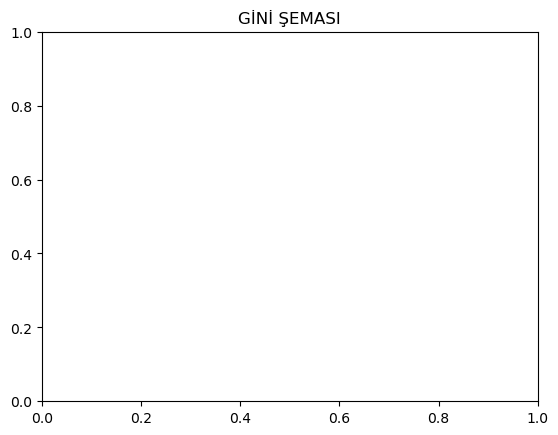

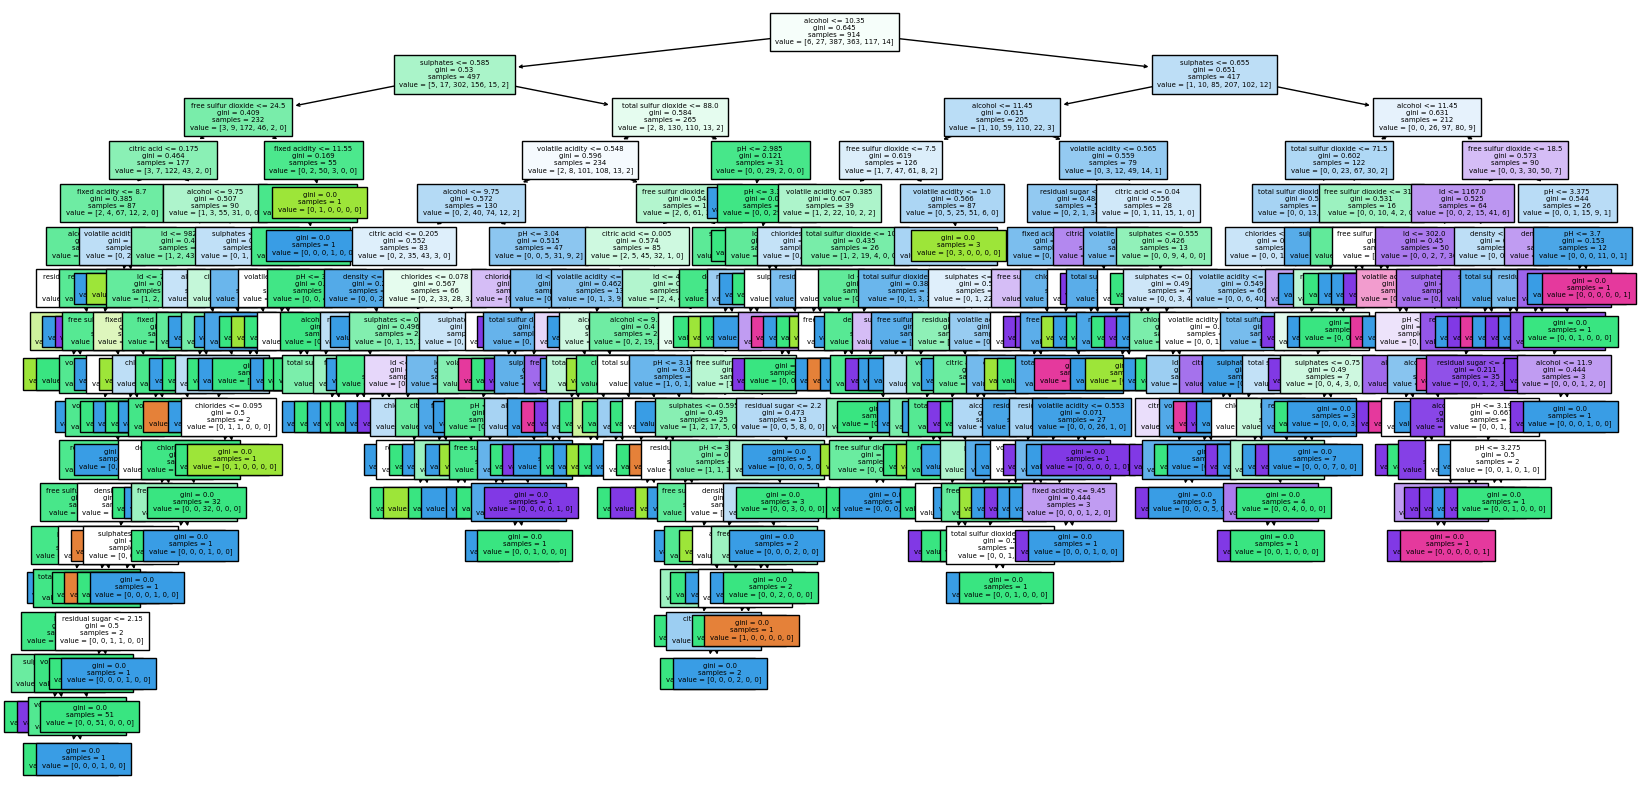

In [18]:
#Görselleştirme
plt.title('GİNİ ŞEMASI')
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=X.columns,filled=True,fontsize=5)
